# Importação

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregar dados

In [2]:
df = pd.concat([load_iris(return_X_y= True, as_frame= True)[0],load_iris(return_X_y= True, as_frame= True)[1]], axis= 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Análise Exploratória

In [3]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

df['species'] = df['target'].map(species_mapping)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
df = df.drop('target', axis = 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


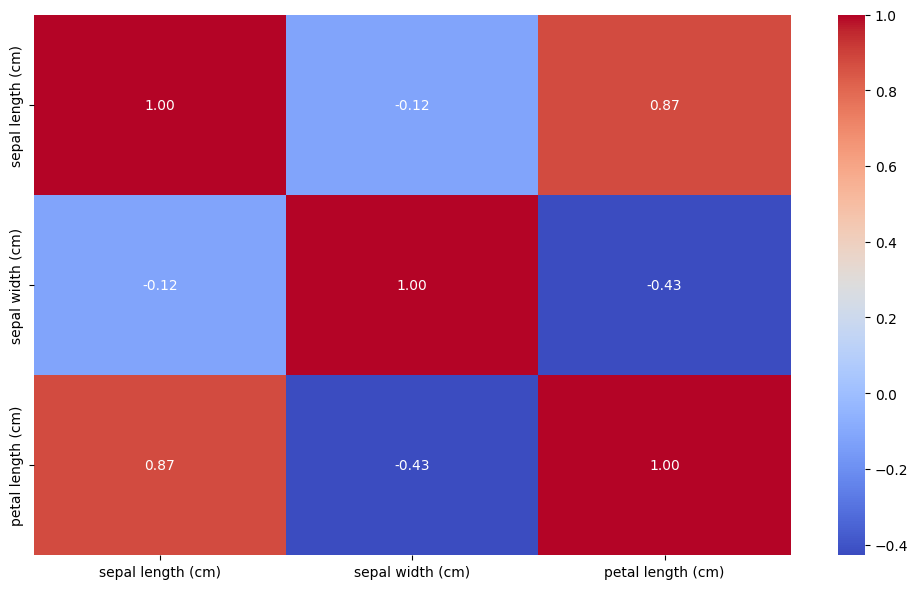

In [8]:
corr = df.iloc[:, 0:3].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)


plt.tight_layout()
plt.show()


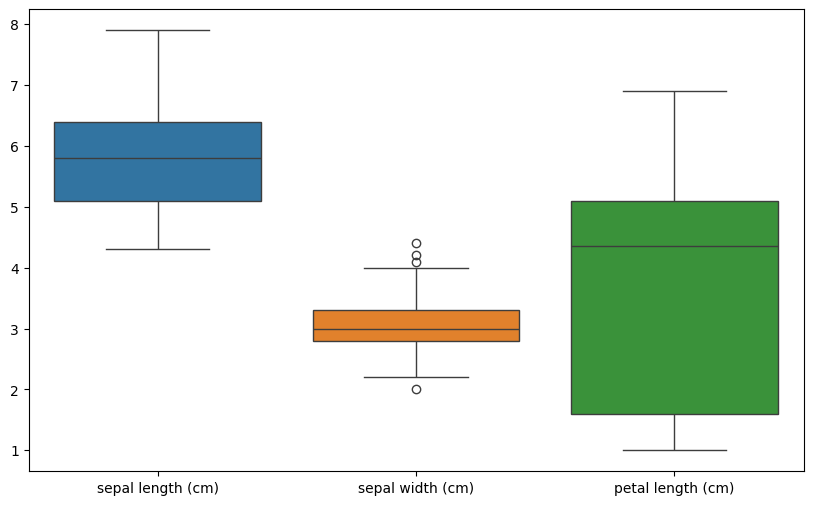

In [9]:
plt.figure(figsize = (10,6))

sns.boxplot(data=df.iloc[:, 0:3])
plt.show()

# Pré Processamento

In [10]:
coluna = 'sepal width (cm)'


Q1 = df[coluna].quantile(0.25)
Q3 = df[coluna].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]

print(f"Sobre a coluna sepal width (cm): O Limite inferior é {limite_inferior} e o superior é {limite_superior} \n")
print(outliers)

Sobre a coluna sepal width (cm): O Limite inferior é 2.05 e o superior é 4.05 

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15                5.7               4.4                1.5               0.4   
32                5.2               4.1                1.5               0.1   
33                5.5               4.2                1.4               0.2   
60                5.0               2.0                3.5               1.0   

       species  
15      setosa  
32      setosa  
33      setosa  
60  versicolor  


In [11]:
media_sepal_width_no_outliers = outliers[coluna].mean()
media_sepal_width_no_outliers

np.float64(3.675)

In [12]:
df['sepal width (cm)'] = df['sepal width (cm)'].apply(
    lambda x: media_sepal_width_no_outliers if (x < limite_inferior or x > limite_superior) else x
)

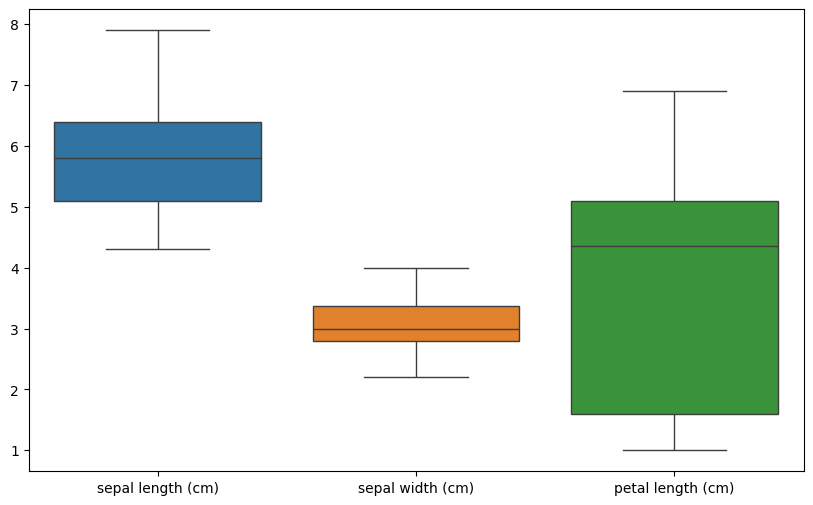

In [13]:
plt.figure(figsize = (10,6))

sns.boxplot(data=df.iloc[:, 0:3])
plt.show()

In [14]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.405660,1.765298,0.762238
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.375000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [ ]:
X = df.drop('species', axis=1)
y = df['species']

<Axes: xlabel='petal width (cm)', ylabel='Count'>

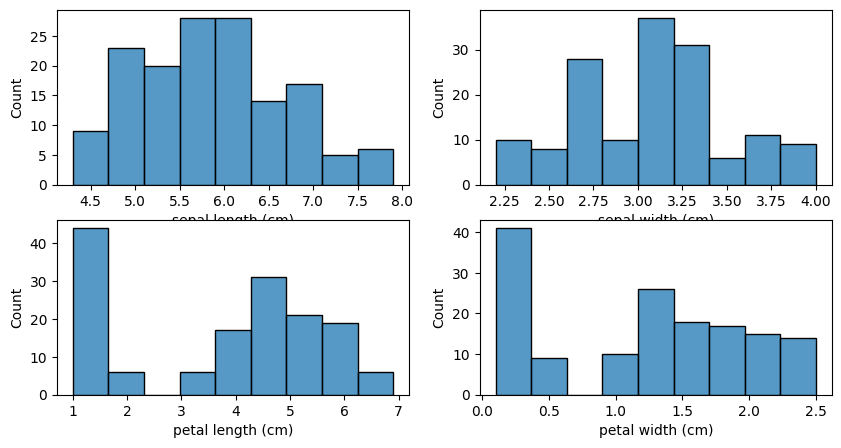

In [23]:
plt.figure(figsize= (10,5))
plt.subplot(2,2,1)
sns.histplot(data= df, x= 'sepal length (cm)')
plt.subplot(2,2,2)
sns.histplot(data= df, x= 'sepal width (cm)')
plt.subplot(2,2,3)
sns.histplot(data= df, x= 'petal length (cm)')
plt.subplot(2,2,4)
sns.histplot(data= df, x= 'petal width (cm)')

In [ ]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)


# DummyClassifier



In [16]:
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)

dummy_clf.fit(X_train, y_train)

y_val_pred = dummy_clf.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Acurácia no conjunto de validação: {val_accuracy:.2f}')

y_test_pred = dummy_clf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Acurácia no conjunto de teste: {test_accuracy:.2f}')

Acurácia no conjunto de validação: 0.35
Acurácia no conjunto de teste: 0.26


# Support Vector Machine

In [17]:
smv = SVC(kernel='linear')

smv.fit(X_train, y_train)

y_val_pred = smv.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Acurácia no conjunto de validação: {val_accuracy:.2f}')

y_test_pred = smv.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Acurácia no conjunto de teste: {test_accuracy:.2f}')

Acurácia no conjunto de validação: 0.95
Acurácia no conjunto de teste: 1.00


# Naive Bayes

In [18]:
naive = GaussianNB()

naive.fit(X_train, y_train)

y_val_pred = naive.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Acurácia no conjunto de validação: {val_accuracy:.2f}')

y_test_pred = naive.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Acurácia no conjunto de teste: {test_accuracy:.2f}')


Acurácia no conjunto de validação: 1.00
Acurácia no conjunto de teste: 1.00


# Avaliando Algortimos

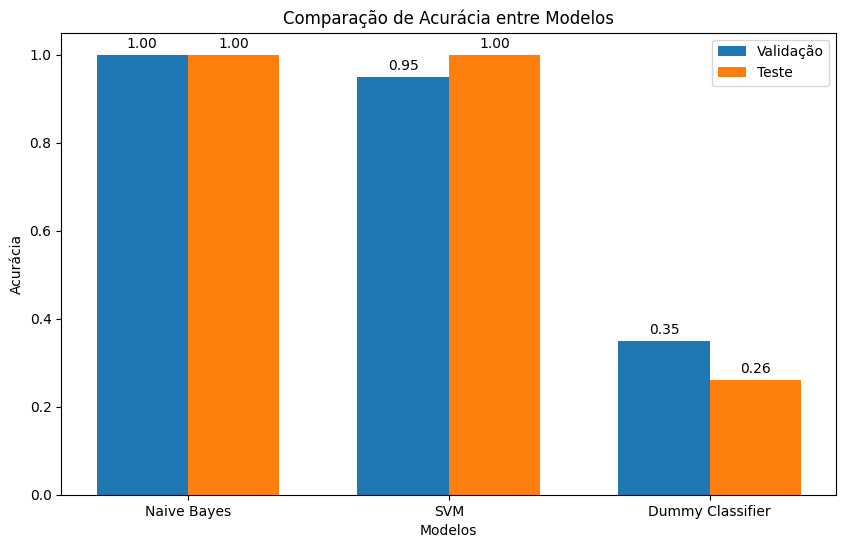

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Inicialização dos modelos
naive = GaussianNB()
smv = SVC(kernel='linear')
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)

# Treinamento e predições para cada modelo
models = [naive, smv, dummy_clf]
model_names = ['Naive Bayes', 'SVM', 'Dummy Classifier']
validation_accuracies = []
test_accuracies = []

# Treinando e avaliando cada modelo
for model in models:
    model.fit(X_train, y_train)

    # Predições para o conjunto de validação
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    validation_accuracies.append(val_accuracy)

    # Predições para o conjunto de teste
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Plotando o gráfico de comparação
x = np.arange(len(model_names))  # Posições dos modelos no gráfico
width = 0.35  # Largura das barras

fig, ax = plt.subplots(figsize=(10, 6))

# Barras para as acurácias de validação e teste
rects1 = ax.bar(x - width/2, validation_accuracies, width, label='Validação')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Teste')

# Adicionando rótulos, título e personalizando o gráfico
ax.set_xlabel('Modelos')
ax.set_ylabel('Acurácia')
ax.set_title('Comparação de Acurácia entre Modelos')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Função para exibir as acurácias nas barras
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Deslocamento do rótulo
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adicionando as acurácias no gráfico
add_labels(rects1)
add_labels(rects2)

plt.show()
